In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
for features in df:
    print(df[features].value_counts())

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64
HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64
HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64
CholCheck
1.0    244210
0.0      9470
Name: count, dtype: int64
BMI
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: count, Length: 84, dtype: int64
Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64
Stroke
0.0    243388
1.0     10292
Name: count, dtype: int64
HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64
PhysActivity
1.0    191920
0.0     61760
Name: count, dtype: int64
Fruits
1.0    160898
0.0     92782
Name: count, dtype: int64
Veggies
1.0    205841
0.0     47839
Name: count, dtype: int64
HvyAlcoholConsump
0.0    239424
1.0     14256
Name: count, dtype: int64
AnyHealthcare
1.0    241263
0.0     12417
Name: count, dtype: int64
NoDocbcC

In [5]:
filtered_df1 = df[df['Diabetes_012'] == 1]
filtered_df2 = df[df['Diabetes_012'] == 2]
filtered_df0 = df[df['Diabetes_012'] == 0]

In [6]:
filtered_df0.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,213703.0,213703.000000,213703.000000,213703.000000,213703.000000,213703.000000,213703.000000,213703.000000,213703.000000,213703.000000,...,213703.000000,213703.00000,213703.000000,213703.000000,213703.000000,213703.000000,213703.000000,213703.000000,213703.000000,213703.000000
mean,0.0,0.371132,0.379171,0.957104,27.742521,0.429680,0.031628,0.071833,0.779077,0.643023,...,0.949739,0.07961,2.372391,2.944404,3.582416,0.132282,0.433985,7.786559,5.106629,6.208663
std,0.0,0.483109,0.485182,0.202623,6.260993,0.495032,0.175008,0.258212,0.414870,0.479109,...,0.218484,0.27069,1.019367,7.064440,7.999205,0.338798,0.495624,3.104942,0.960423,2.005203
min,0.0,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.0,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.0,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.0,1.000000,1.000000,1.000000,30.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.00000,3.000000,2.000000,2.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,0.0,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
filtered_df1.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,4631.0,4631.000000,4631.000000,4631.000000,4631.000000,4631.000000,4631.000000,4631.000000,4631.000000,4631.000000,...,4631.000000,4631.000000,4631.000000,4631.000000,4631.000000,4631.000000,4631.000000,4631.000000,4631.000000,4631.000000
mean,1.0,0.629022,0.620816,0.986612,30.724466,0.492766,0.057223,0.143382,0.678471,0.602246,...,0.945152,0.129346,2.975599,4.529907,6.348305,0.277478,0.437702,9.083351,4.784496,5.351112
std,0.0,0.483119,0.485236,0.114942,6.964898,0.500002,0.232293,0.350499,0.467114,0.489487,...,0.227707,0.335618,1.027930,8.897176,10.298013,0.447803,0.496157,2.632896,1.074235,2.208715
min,1.0,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.0,0.000000,0.000000,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.0,1.000000,1.000000,1.000000,30.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.0,1.000000,1.000000,1.000000,34.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,4.000000,8.000000,1.000000,1.000000,11.000000,6.000000,7.000000
max,1.0,1.000000,1.000000,1.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
filtered_df2.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,35346.0,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,...,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000
mean,2.0,0.752674,0.670118,0.993182,31.944011,0.518220,0.092457,0.222882,0.630538,0.585441,...,0.959769,0.105868,3.290981,4.461806,7.954479,0.371216,0.479121,9.379053,4.745516,5.210094
std,0.0,0.431464,0.470177,0.082292,7.363401,0.499675,0.289675,0.416186,0.482666,0.492653,...,0.196503,0.307673,1.009928,8.947717,11.301491,0.483137,0.499571,2.330273,1.060617,2.217319
min,2.0,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.0,1.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,4.000000,3.000000
50%,2.0,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,10.000000,5.000000,6.000000
75%,2.0,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,3.000000,15.000000,1.000000,1.000000,11.000000,6.000000,7.000000
max,2.0,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


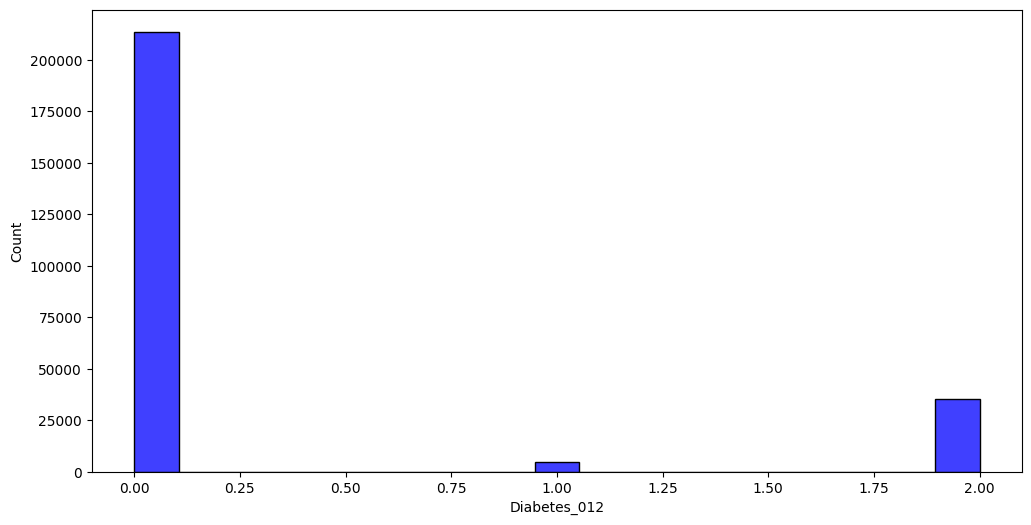

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


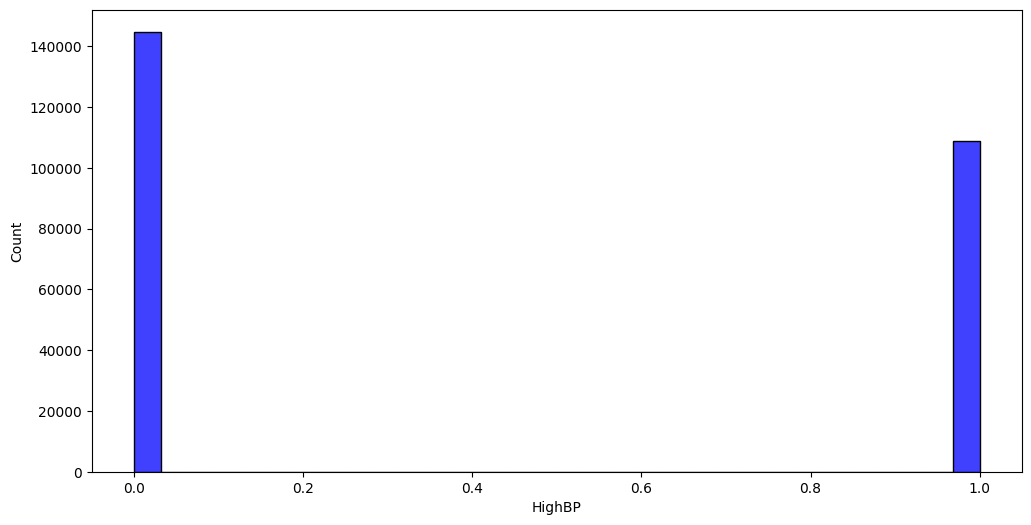

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


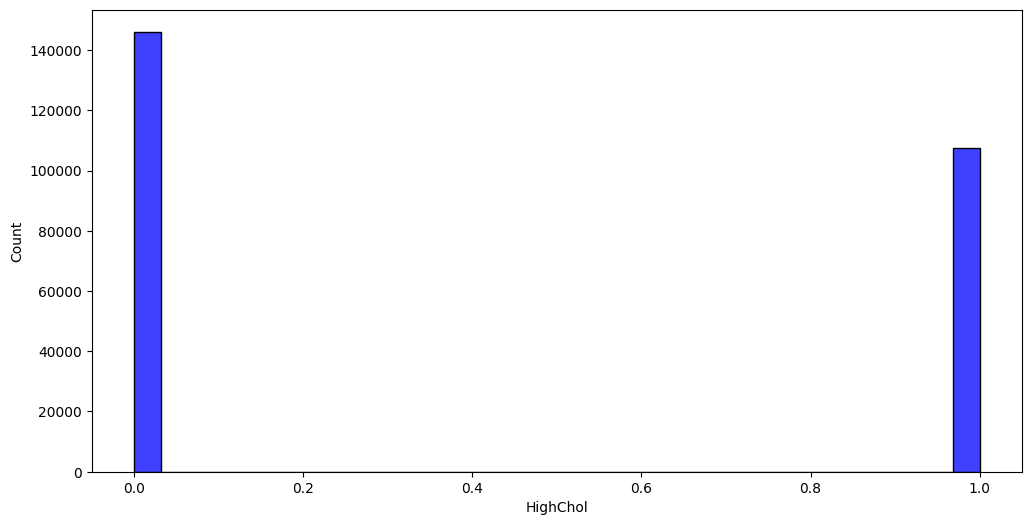

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


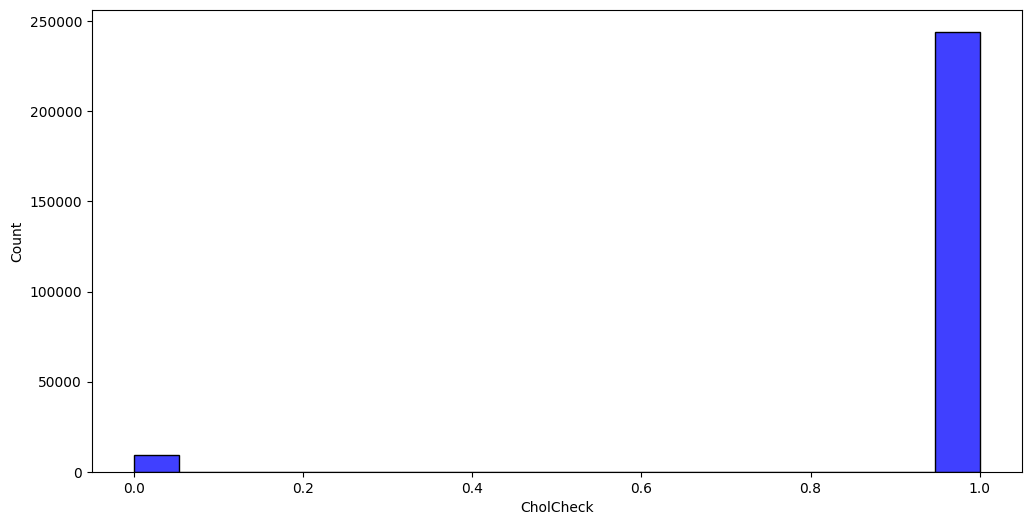

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


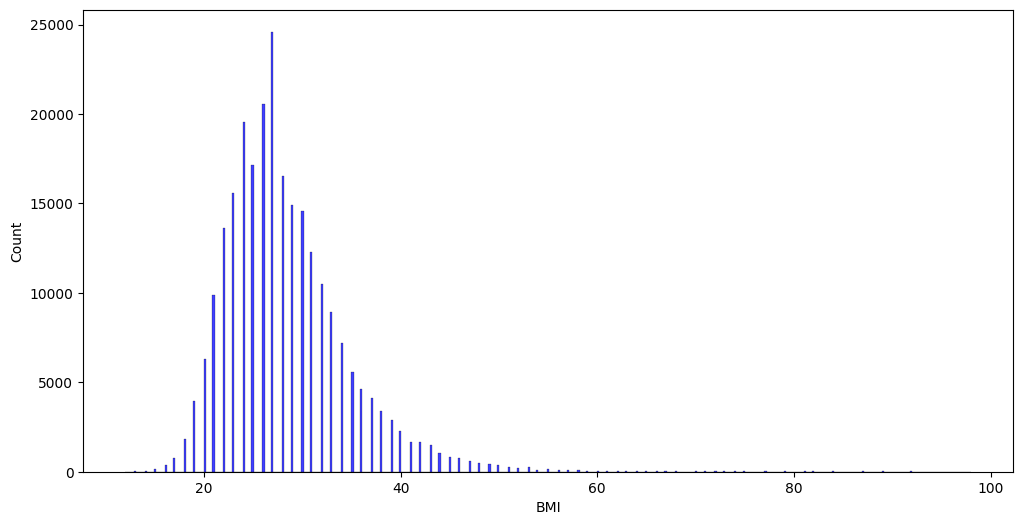

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


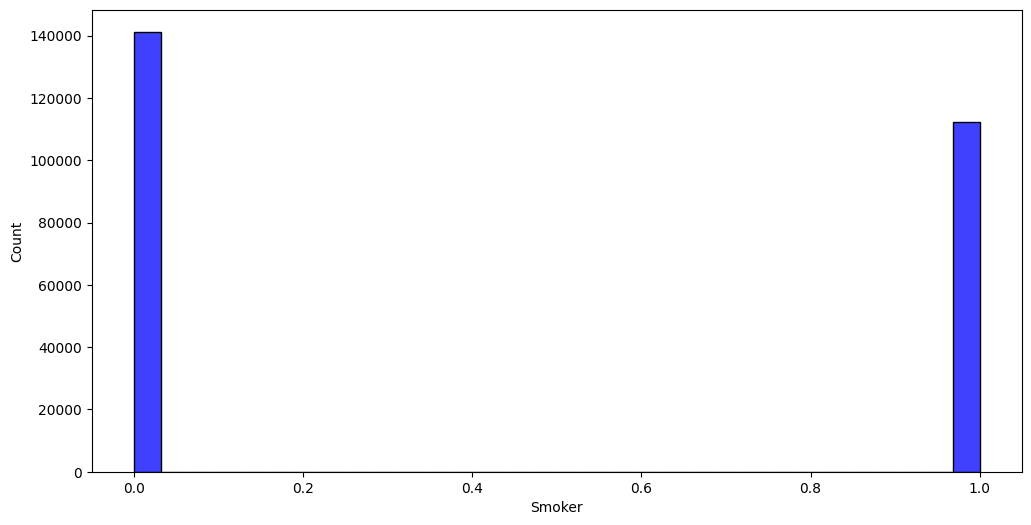

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


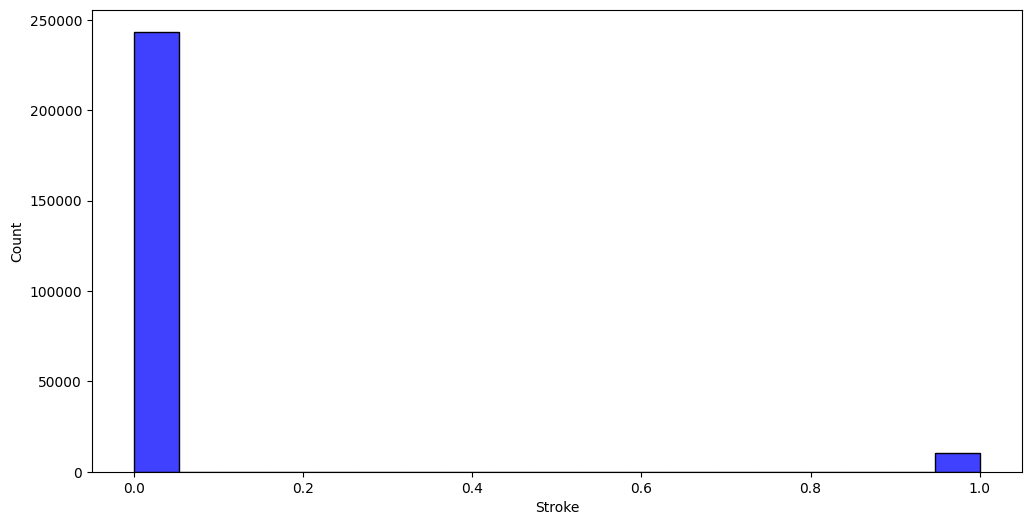

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


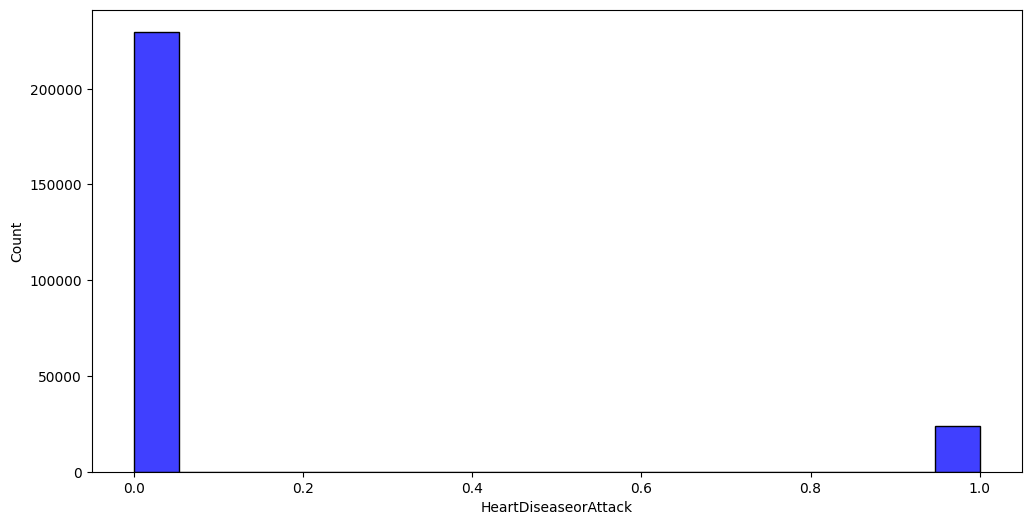

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


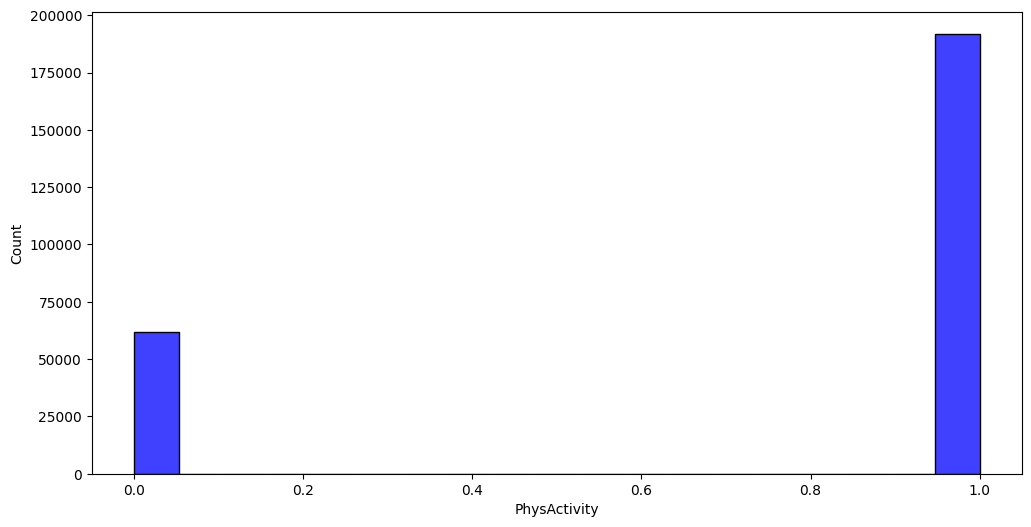

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


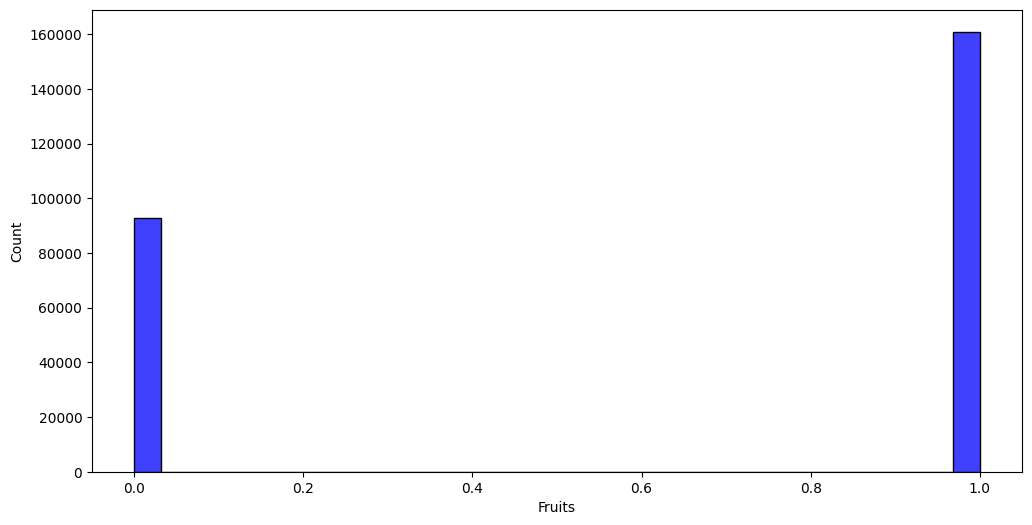

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


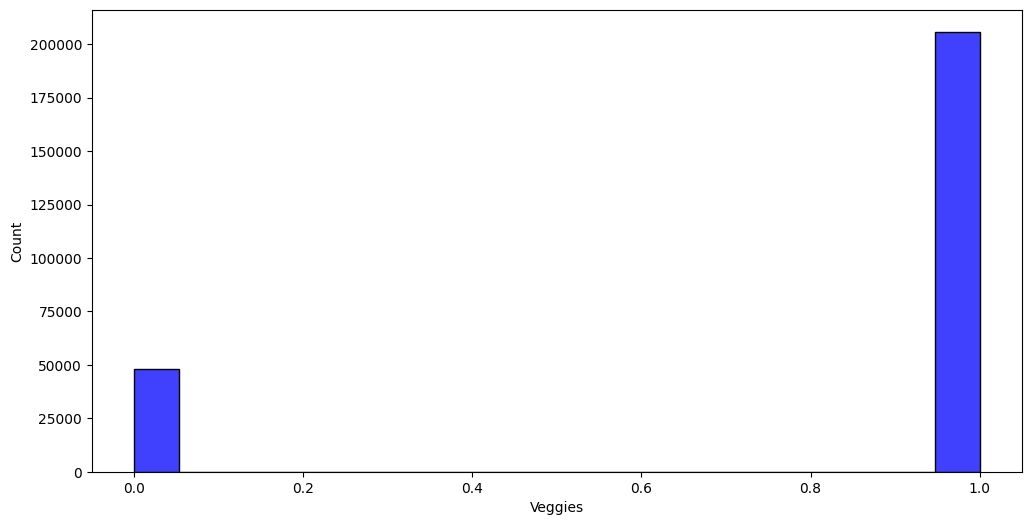

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


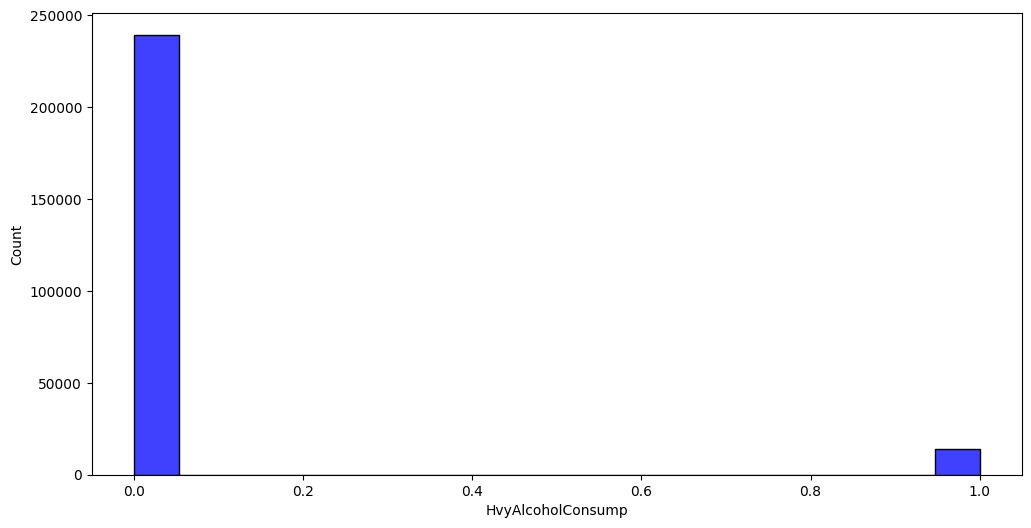

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


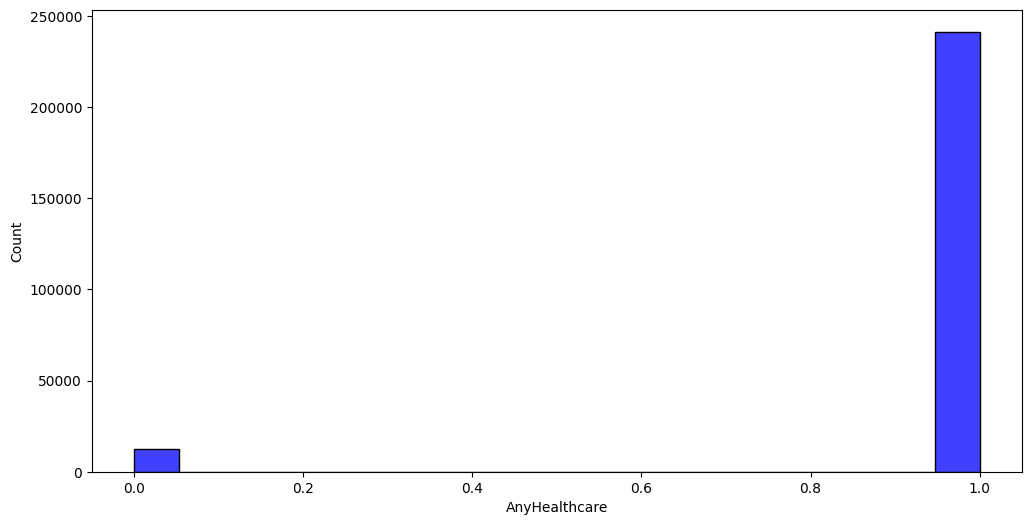

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


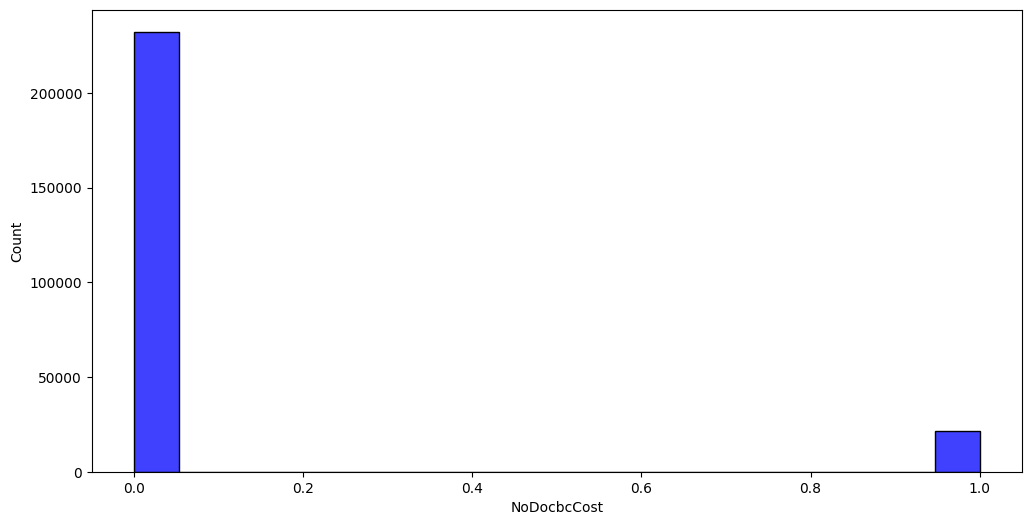

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


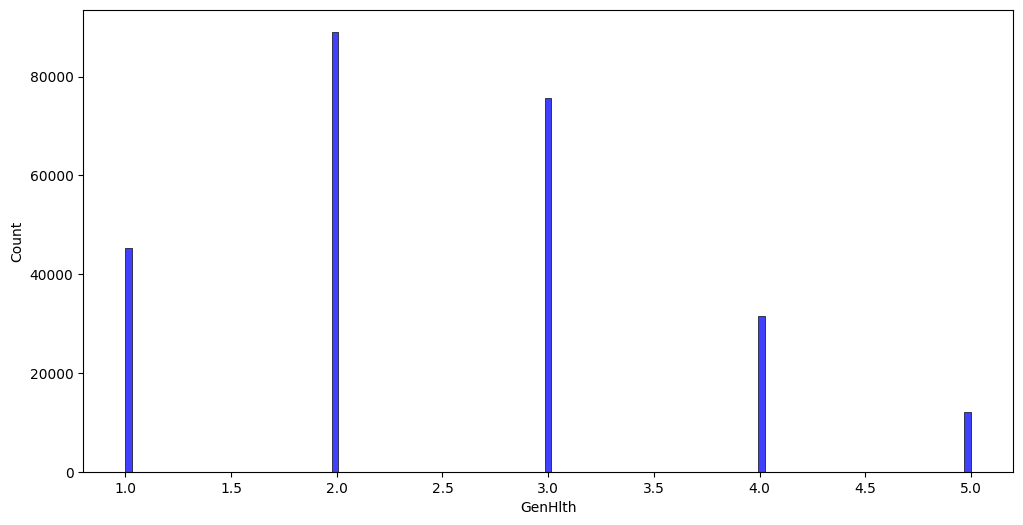

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


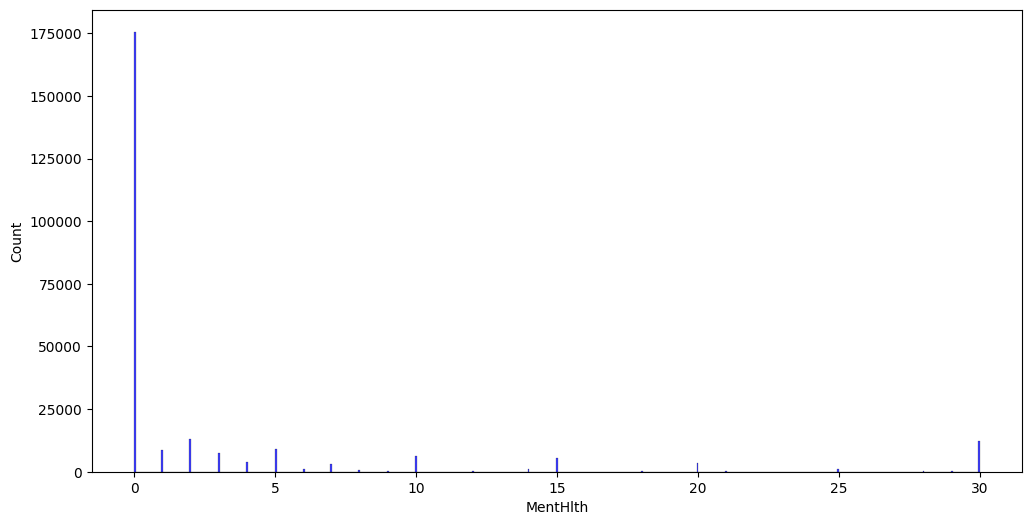

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


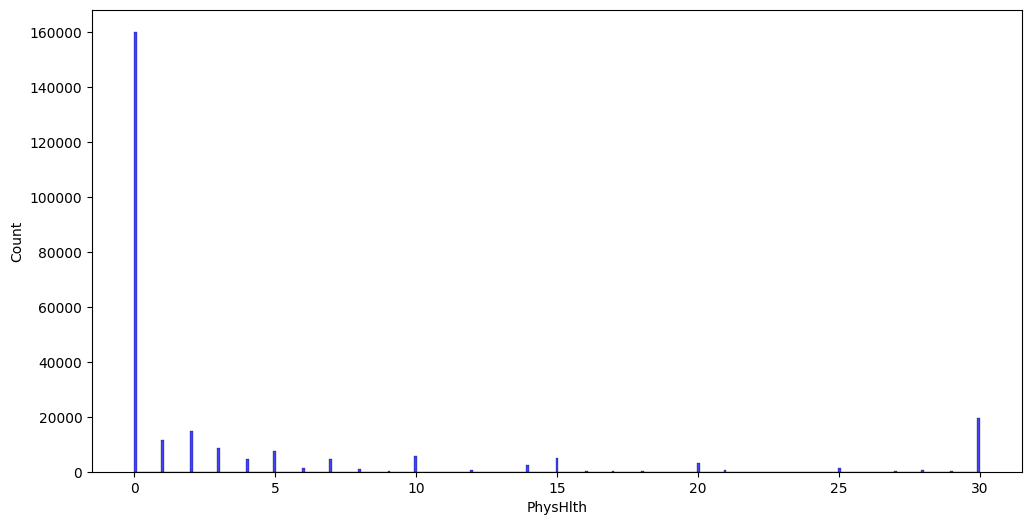

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


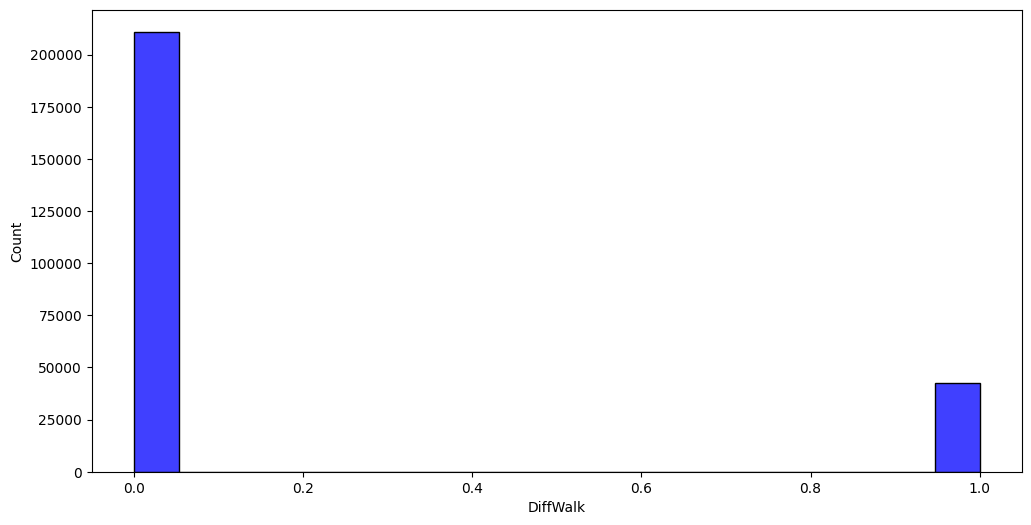

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


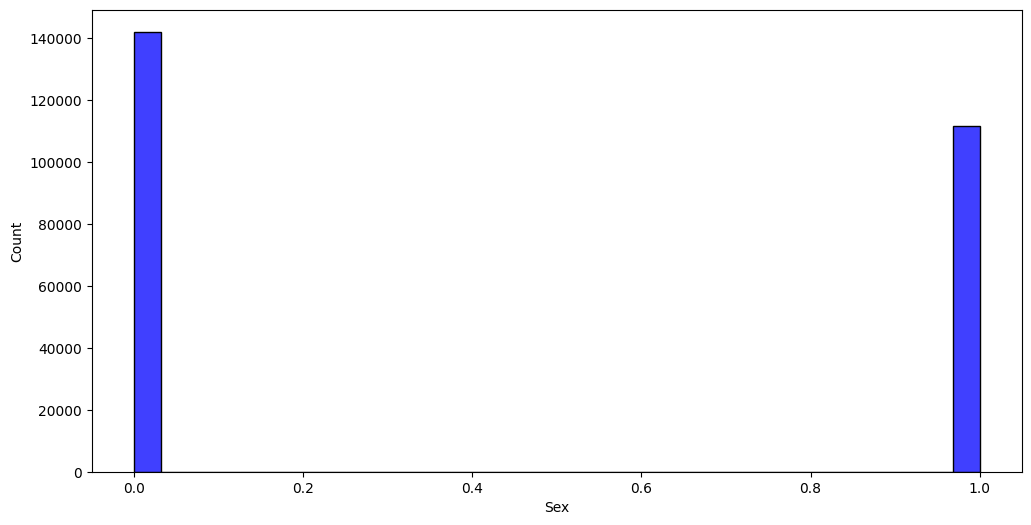

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


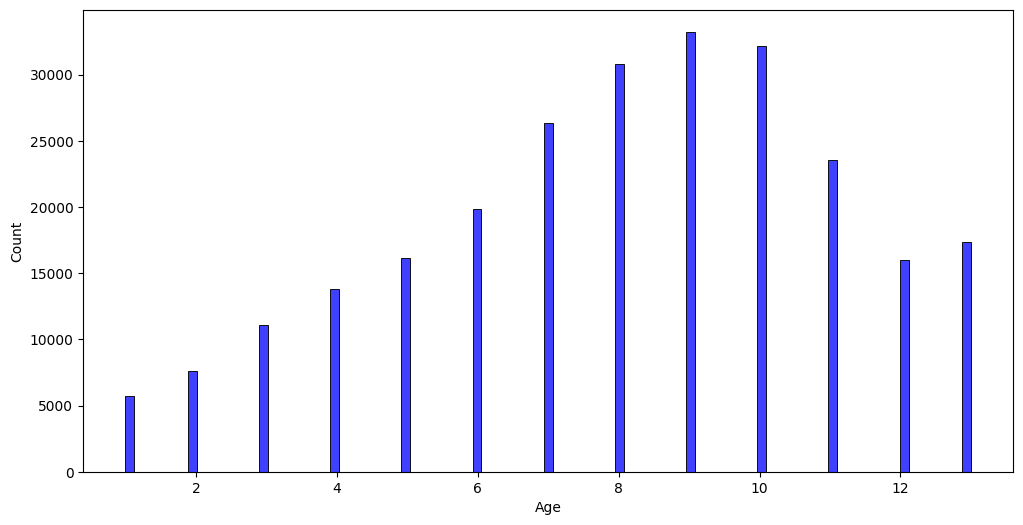

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


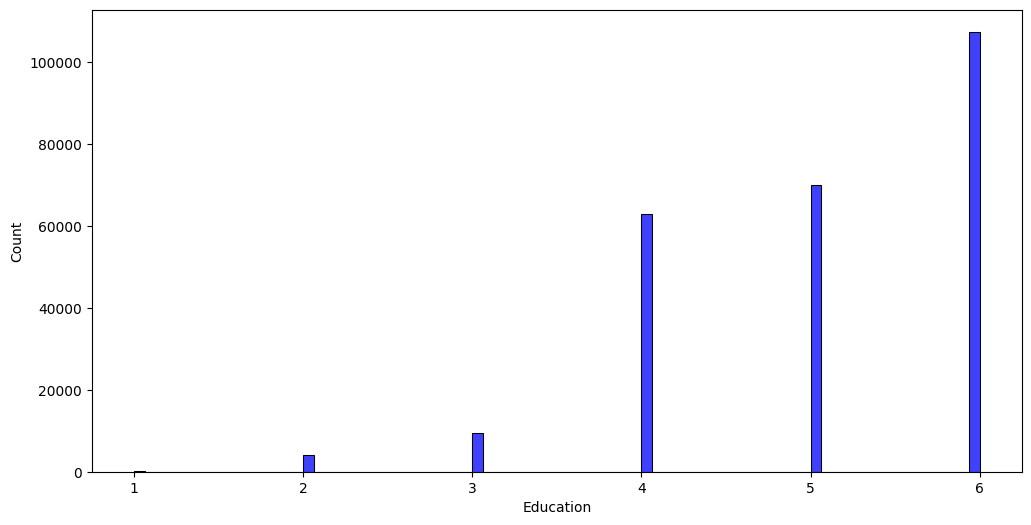

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


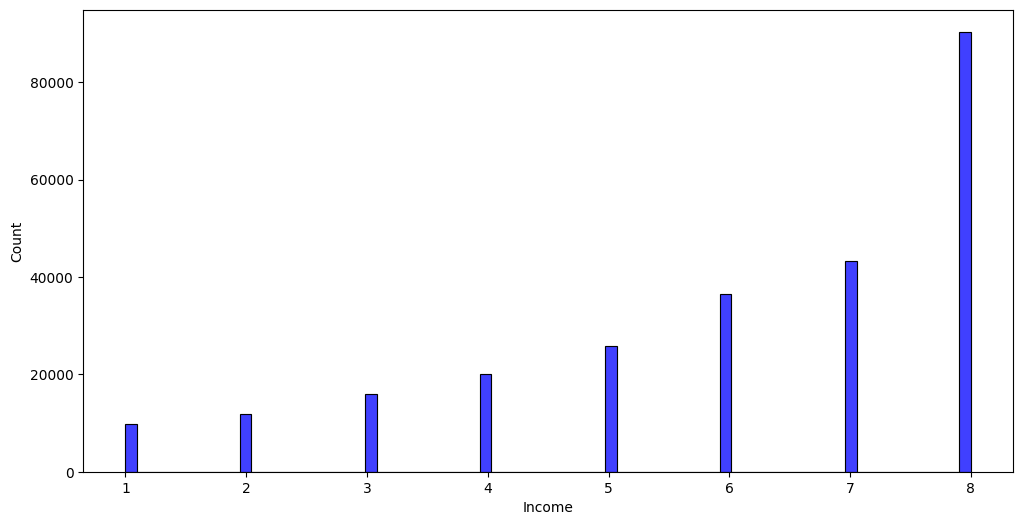

In [9]:
for feature in df.columns:
    plt.figure(figsize = (12,6))
    sns.histplot(df[feature], color='blue')
    plt.show()

In [10]:
features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']
for feature in features:
    df[feature] = df[feature].astype(bool)

In [11]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,True,True,True,40.0,True,False,False,False,False,...,True,False,5.0,18.0,15.0,True,0.0,9.0,4.0,3.0
1,0.0,False,False,False,25.0,True,False,False,True,False,...,False,True,3.0,0.0,0.0,False,0.0,7.0,6.0,1.0
2,0.0,True,True,True,28.0,False,False,False,False,True,...,True,True,5.0,30.0,30.0,True,0.0,9.0,4.0,8.0
3,0.0,True,False,True,27.0,False,False,False,True,True,...,True,False,2.0,0.0,0.0,False,0.0,11.0,3.0,6.0
4,0.0,True,True,True,24.0,False,False,False,True,True,...,True,False,2.0,3.0,0.0,False,0.0,11.0,5.0,4.0


In [12]:
df['unh'] = (df['Smoker']==True) & (df['HvyAlcoholConsump']==True) 
df['unhe'] = (df['Smoker']==True) & (df['HvyAlcoholConsump']==True) & (df['HighChol']==True)
df['mean_hlth']=(df['PhysHlth']+df['MentHlth'])/2

In [13]:
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = xgb.XGBClassifier(n_estimators=120, learning_rate=0.05, max_depth=7)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.09%


In [16]:
importances = model.feature_importances_
df1 = df.drop('Diabetes_012', axis=1)
feature_names = df1.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names,'Importance':
                                     importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

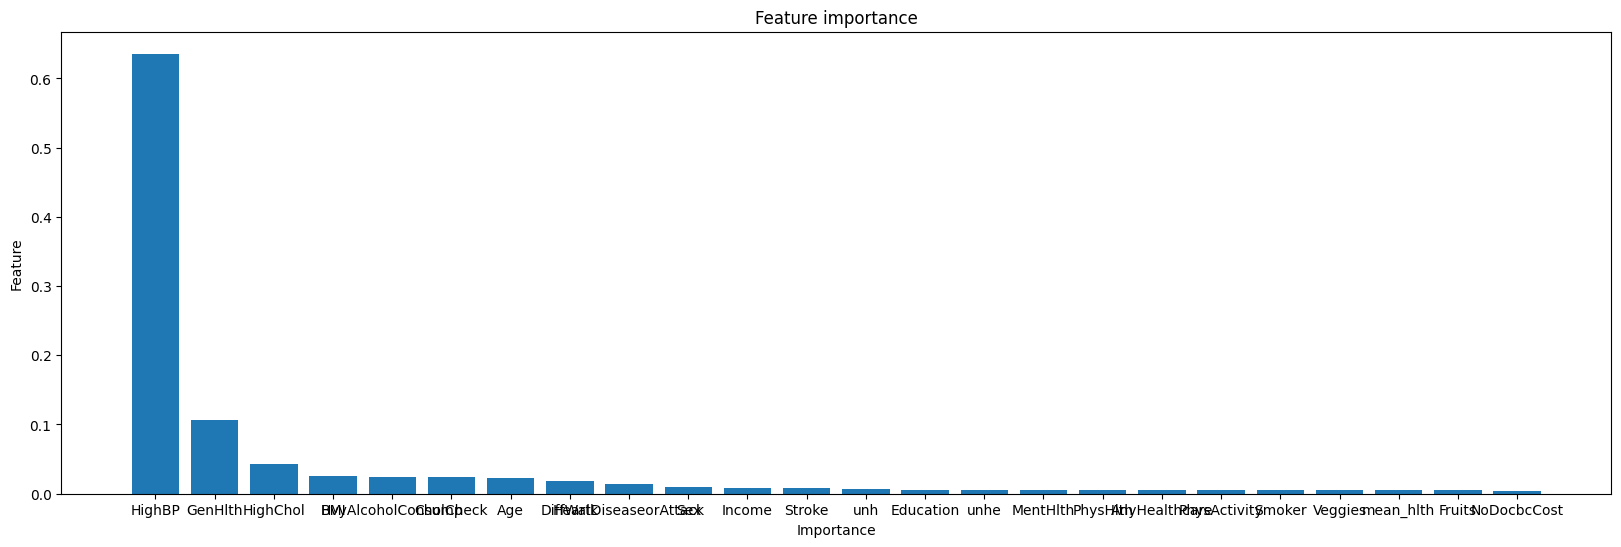

In [17]:
plt.figure(figsize=(20, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature importance')
plt.show()